# ANALYSIS OF ACTIVITY LOG DATA OF A SUPERSTORE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
pd.set_option('display.float_format','{:.2f}'.format)

In [3]:
# DATA
data = pd.read_csv('Superstore.csv', parse_dates=['Order Date', 'Ship Date'])

## EXPLORATORY DATA ANALYSIS

#### Data Sample

In [4]:
# Data Sample
data.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5051,5052,CA-2015-134922,2015-11-07,2015-11-11,Standard Class,KB-16240,Karen Bern,Corporate,United States,Philadelphia,...,19140,East,OFF-EN-10000483,Office Supplies,Envelopes,"White Envelopes, White Envelopes with Clear Po...",24.40,2,0.20,7.93
8170,8171,CA-2017-107174,2017-11-06,2017-11-13,Standard Class,AB-10060,Adam Bellavance,Home Office,United States,Seattle,...,98105,West,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,108.96,3,0.00,32.69
7390,7391,CA-2017-108035,2017-11-29,2017-12-03,Standard Class,TT-21070,Ted Trevino,Consumer,United States,Chattanooga,...,37421,South,FUR-FU-10004017,Furniture,Furnishings,"Executive Impressions 13"" Chairman Wall Clock",101.52,5,0.20,19.04
6552,6553,CA-2017-161578,2017-12-16,2017-12-21,Second Class,RB-19465,Rick Bensley,Home Office,United States,Los Angeles,...,90036,West,OFF-ST-10002289,Office Supplies,Storage,"Safco Wire Cube Shelving System, For Use as 4 ...",158.90,5,0.00,7.95
6317,6318,CA-2014-100762,2014-11-24,2014-11-29,Standard Class,NG-18355,Nat Gilpin,Corporate,United States,Jackson,...,49201,Central,OFF-PA-10004082,Office Supplies,Paper,Adams Telephone Message Book w/Frequently-Call...,15.96,2,0.00,7.98
6203,6204,CA-2016-133669,2016-10-21,2016-10-27,Standard Class,SV-20935,Susan Vittorini,Consumer,United States,Columbus,...,43229,East,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,235.15,8,0.40,-47.03
107,108,CA-2017-119004,2017-11-23,2017-11-28,Standard Class,JM-15250,Janet Martin,Consumer,United States,Charlotte,...,28205,South,TEC-PH-10002844,Technology,Phones,Speck Products Candyshell Flip Case,27.99,1,0.20,2.10
1828,1829,US-2015-140851,2015-07-13,2015-07-15,Second Class,ND-18460,Neil Ducich,Corporate,United States,Macon,...,31204,South,OFF-PA-10000019,Office Supplies,Paper,Xerox 1931,38.88,6,0.00,18.66
1640,1641,CA-2016-157266,2016-05-26,2016-06-01,Standard Class,TB-21280,Toby Braunhardt,Consumer,United States,Washington,...,20016,East,OFF-PA-10004675,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,12.70,2,0.00,5.84
3933,3934,CA-2017-123001,2017-09-02,2017-09-08,Standard Class,AW-10840,Anthony Witt,Consumer,United States,Bakersfield,...,93309,West,OFF-AR-10001919,Office Supplies,Art,"OIC #2 Pencils, Medium Soft",9.40,5,0.00,2.73


#### Variables in Dataframe

In [5]:
# Name of variables
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
# Converts percentage discount to monetary value
data['Discount'] = data.Sales * data.Discount

#### Data Infromation

In [7]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
# Elimina la variable 'Row ID'
data.drop('Row ID', axis=1, inplace=True)

In [9]:
# Temporal Range
first_date = data['Order Date'].dt.date.min()
last_date = data['Order Date'].dt.date.max()

print('='*64)
print('THE DATA INCLUDES FROM '+str(first_date)+' TO '+str(last_date))
print('='*64)

THE DATA INCLUDES FROM 2014-01-03 TO 2017-12-30


In [10]:
# Descriptive Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.00,55190.38,32063.69,1040.00,23223.00,56430.50,90008.00,99301.00
Sales,9994.00,229.86,623.25,0.44,17.28,54.49,209.94,22638.48
Quantity,9994.00,3.79,2.23,1.00,2.00,3.00,5.00,14.00
Discount,9994.00,32.28,164.03,0.00,0.00,1.04,14.87,11319.24
Profit,9994.00,28.66,234.26,-6599.98,1.73,8.67,29.36,8399.98


#### Number of Unique Values per Categorical Variable

In [11]:
# NUMBER OF UNIQUE VALUES PER CATEGORICAL VARIABLE
print('NUMBER OF UNIQUE VALUES PER CATEGORICAL VARIABLE')
print('='*64)
for cat in data.select_dtypes('object'):
        print(cat+' : '+ str(data[cat].nunique()))

NUMBER OF UNIQUE VALUES PER CATEGORICAL VARIABLE
Order ID : 5009
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


#### Unique Values per Categorical variable

In [12]:
print('UNIQUE VALUES PER CATEGORICAL FEATURE:')
print('='*64)
print('='*64)
for vcat in data.select_dtypes('object'):
    if data[vcat].nunique() < 21:
        print(vcat+' :')
        print(data[vcat].unique())
        print('='*64)

UNIQUE VALUES PER CATEGORICAL FEATURE:
Ship Mode :
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment :
['Consumer' 'Corporate' 'Home Office']
Country :
['United States']
Region :
['South' 'West' 'Central' 'East']
Category :
['Furniture' 'Office Supplies' 'Technology']
Sub-Category :
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [13]:
features =  ['Sales','Quantity','Discount','Profit']

## ANALISIS BY REGION

#### Data Grouped By Region

In [14]:
# Running auxiliar function

%run ./auxiliar_functions/groupingData.ipynb

In [15]:
# Grouping data by 'Region'
# =========================================================================

data_by_region = groupingData(data, features, 'Region')
data_by_region

,Sales,Quantity,Discount,Profit,SalesPercent,QuantityPercent,DiscountPercent,ProfitPercent
Region,,,,,,,,
Central,501239.89,8780,77787.66,39706.36,21.82,23.18,24.11,13.86
East,678781.24,10618,94608.63,91522.78,29.55,28.04,29.33,31.96
South,391721.91,6209,56779.16,46749.43,17.05,16.39,17.60,16.32
West,725457.82,12266,93406.68,108418.45,31.58,32.39,28.96,37.86


#### Visualization Of Numerical Variables 

In [16]:
# Running auxiliar function 

%run ./auxiliar_functions/plotDataGroups.ipynb

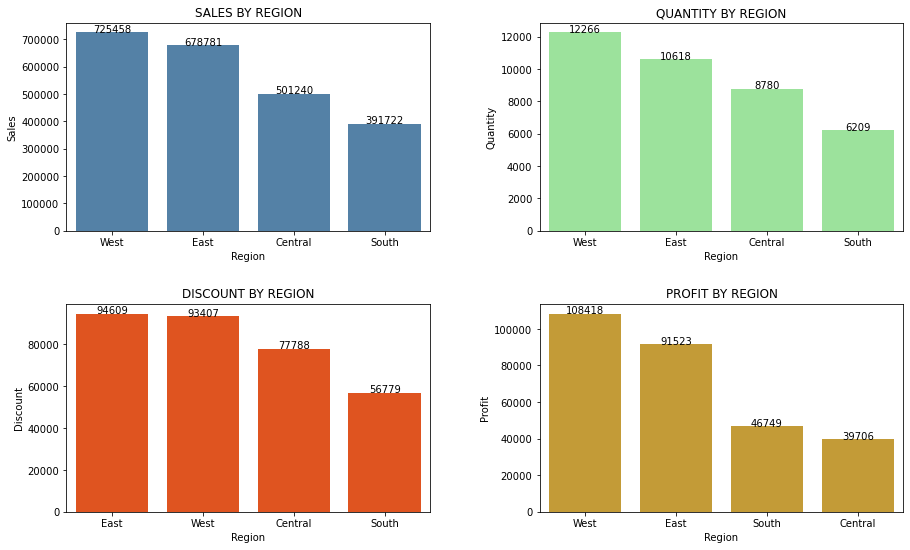

In [17]:
# DATA VISUALIZATION BY REGION
# ================================================================================

plotDataGroups(data_by_region, features, 'Region')

## ANALISIS BY CUSTOMER SEGMENT

#### Data grouped by Customer Segment

In [18]:
# GROUPING DATA BY SEGMENT
# =========================================================================
data_by_segment = groupingData(data, features, 'Segment')
data_by_segment

,Sales,Quantity,Discount,Profit,SalesPercent,QuantityPercent,DiscountPercent,ProfitPercent
Segment,,,,,,,,
Consumer,1161401.34,19521,166267.36,134119.21,50.56,51.54,51.54,46.83
Corporate,706146.37,11608,91389.40,91979.13,30.74,30.65,28.33,32.12
Home Office,429653.15,6744,64925.37,60298.68,18.70,17.81,20.13,21.05


#### Visualization of Data by Customer Segment

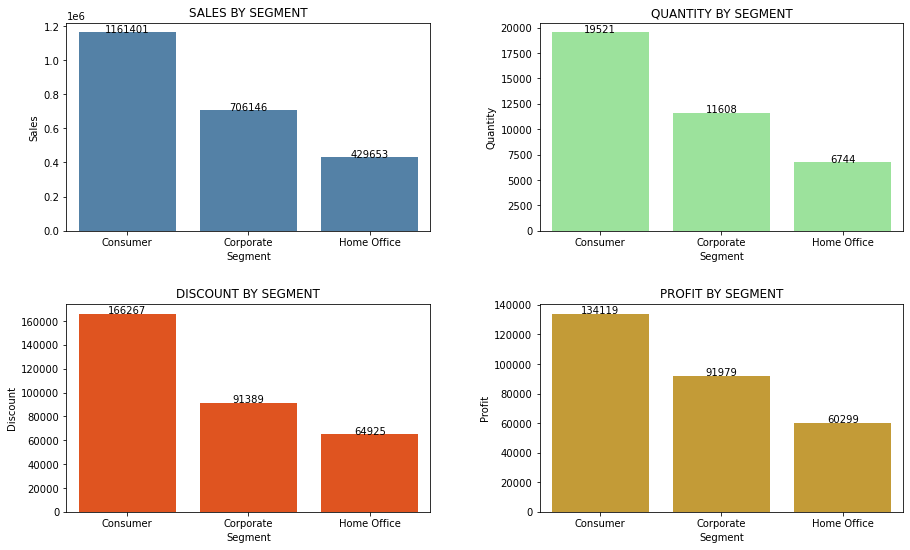

In [19]:
# DATA VISUALIZATION BY SEGMENT
# ================================================================================
plotDataGroups(data_by_segment, features, 'Segment')

## ANALISIS BY PRODUCT CATEGORY

#### Data grouped by Product Category

In [20]:
# GROUPING BY CATEGORY
# =========================================================================
data_by_category = groupingData(data, features, 'Category')
data_by_category

,Sales,Quantity,Discount,Profit,SalesPercent,QuantityPercent,DiscountPercent,ProfitPercent
Category,,,,,,,,
Furniture,741999.80,8028,123516.54,18451.27,32.30,21.20,38.29,6.44
Office Supplies,719047.03,22906,76404.94,122490.80,31.30,60.48,23.69,42.77
Technology,836154.03,6939,122660.65,145454.95,36.40,18.32,38.02,50.79


#### Visualization of Data by Product Category

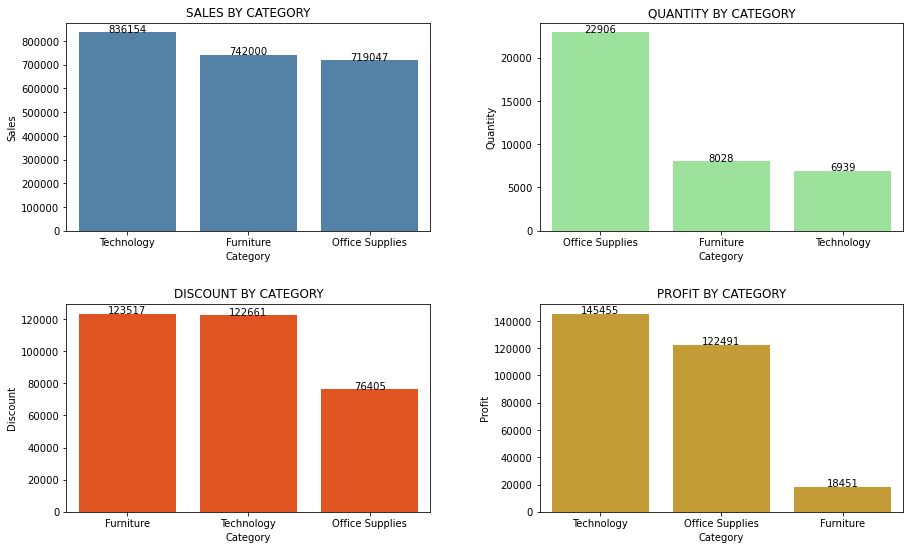

In [21]:
# DATA VISUALIZATION BY CATEGORY
# ================================================================================
plotDataGroups(data_by_category, features, 'Category')

## ANALISIS BY SUB-CATEGORY PRODUCT

In [22]:
# GROUPING BY SUB-CATEGORY
# ================================================================================
data_by_sub = groupingData(data, features, 'Sub-Category')

,Sales,Quantity,Discount,Profit,SalesPercent,QuantityPercent,DiscountPercent,ProfitPercent
Sub-Category,,,,,,,,
Accessories,167380.32,2976,9802.00,41936.64,7.29,7.86,3.04,14.64
Appliances,107532.16,1729,7490.30,18138.01,4.68,4.57,2.32,6.33
Art,27118.79,3000,1820.83,6527.79,1.18,7.92,0.56,2.28
Binders,203412.73,5974,43745.08,30221.76,8.85,15.77,13.56,10.55
Bookcases,114880.00,868,20800.59,-3472.56,5.00,2.29,6.45,-1.21
Chairs,328449.10,2356,49814.80,26590.17,14.30,6.22,15.44,9.28
Copiers,149528.03,234,17999.73,55617.82,6.51,0.62,5.58,19.42
Envelopes,16476.40,906,1173.99,6964.18,0.72,2.39,0.36,2.43
Fasteners,3024.28,914,240.29,949.52,0.13,2.41,0.07,0.33


#### Visualization of Data by Sub-Category Product

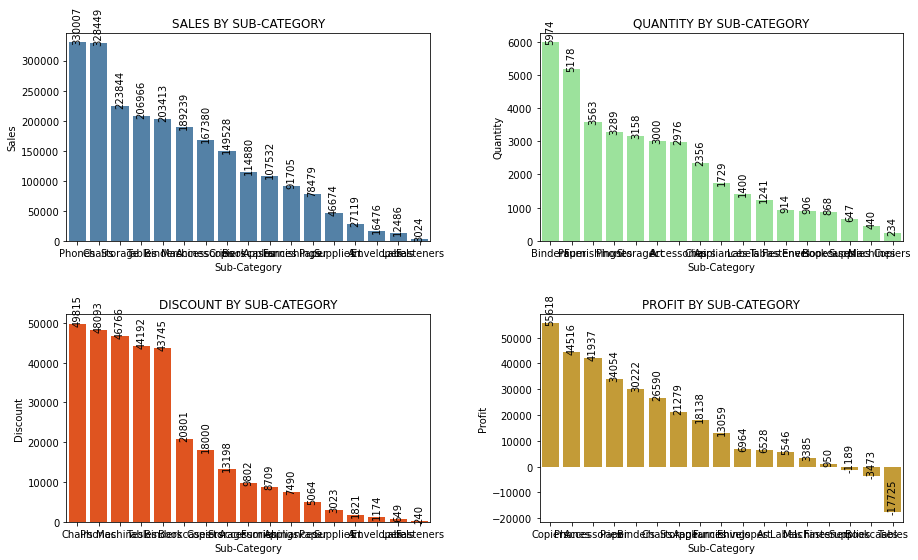

In [23]:
# DATA VISUALIZATION BY SUB-CATEGORY
# ================================================================================
plotDataGroups(data_by_sub, features, 'Sub-Category', 45, 90)

### SUBCATEGORIES REPORTING LOSSES

In [24]:
# Only Losses Data
losses = data[data['Sub-Category'].isin(['Supplies','Bookcases','Tables'])]

# Losses grouped by the variables that report losses
losses_by_sub = groupingData(losses, features, 'Sub-Category')
losses_by_sub

,Sales,Quantity,Discount,Profit,SalesPercent,QuantityPercent,DiscountPercent,ProfitPercent
Sub-Category,,,,,,,,
Bookcases,114880.00,868,20800.59,-3472.56,31.17,31.49,30.58,15.51
Supplies,46673.54,647,3022.87,-1189.10,12.67,23.48,4.44,5.31
Tables,206965.53,1241,44192.20,-17725.48,56.16,45.03,64.97,79.18


#### Visualization of Losses by Subcategory

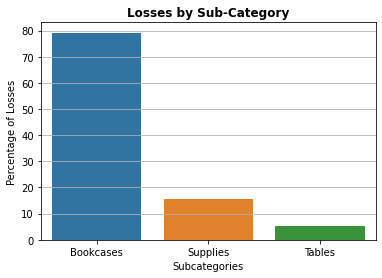

In [25]:
# Visualization of losses by 'Sub-Category
sns.barplot(x=losses_by_sub.index, y=losses_by_sub['ProfitPercent'].sort_values(ascending=False))
plt.title("Losses by Sub-Category", fontweight="bold")
plt.xlabel("Subcategories")
plt.ylabel("Percentage of Losses")
plt.grid(axis='y')
plt.show()

#### Visualization of Losses

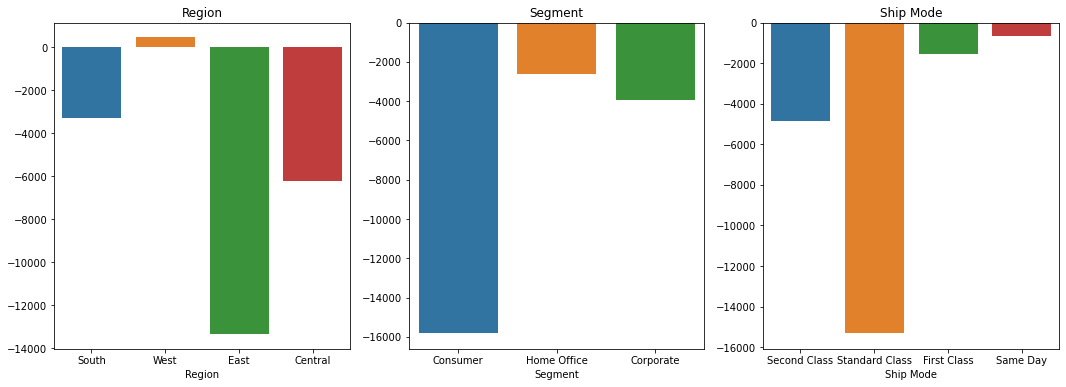

In [26]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

for i, var in enumerate(['Region','Segment','Ship Mode']):
    sns.barplot(x=losses[var], y=losses.Profit, estimator=sum, ci=None, ax=ax[i])
    ax[i].set_title(var)
    ax[i].set_ylabel(None)

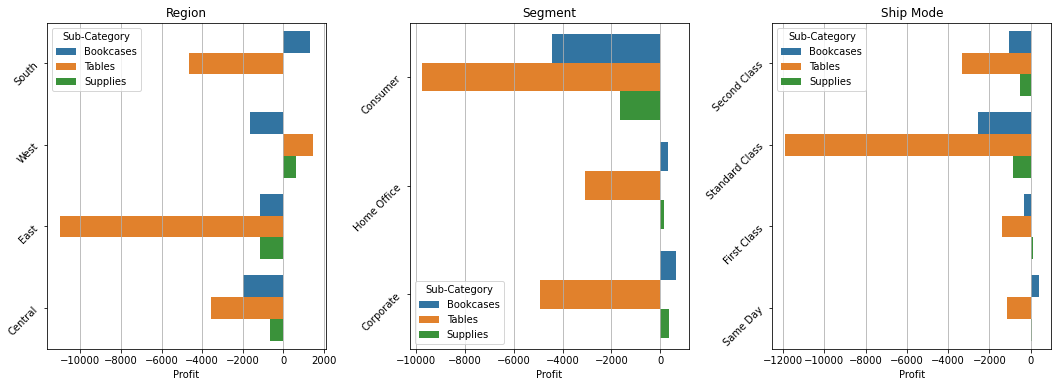

In [27]:
# Visualizing loss making Sub-Categories by categorical variables
# ===========================================================================

fig, ax = plt.subplots(1,3, figsize=(18,6))

for i, var in enumerate(['Region','Segment','Ship Mode']):
    sns.barplot(y=losses[var], x=losses.Profit, hue=losses['Sub-Category'], estimator=sum, ci=None, ax=ax[i])
    ax[i].set_title(var)
    ax[i].set_ylabel(None)
    ax[i].tick_params(axis='y', rotation=45)
    ax[i].grid(axis='x')
    
    
plt.subplots_adjust(wspace=.3)

### Tables Losses

In [28]:
# Only Tables
tables = losses[losses['Sub-Category']=='Tables']

# Tables data grouped by 'Customer ID'
tables_product_id = tables.groupby('Product ID').sum()

# Create 'LostPercent' variable
tables_product_id['LostPercent'] = tables_product_id.Profit / sum(tables_product_id.Profit) * 100

# Sorting data by 'LostPercent'
tables_product_id = tables_product_id.sort_values('LostPercent', ascending=False)


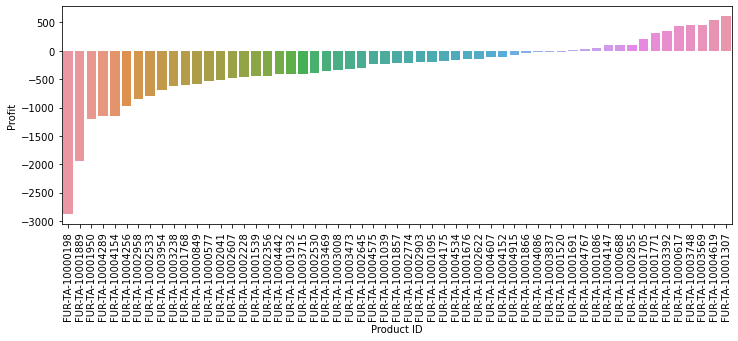

In [29]:
plt.figure(figsize=(12, 4))
sns.barplot(x=tables_product_id.index, y=tables_product_id.Profit)
plt.xticks(rotation=90)
plt.show()

### Bookcases Losses

In [61]:
# Only Bookcases Data
bookcases = losses[losses['Sub-Category']=='Bookcases']

# Bookcases data group by 'Product ID'
bookcases = groupingData(bookcases, features, 'Product ID')
bookcases.sort_values('Profit', inplace=True)

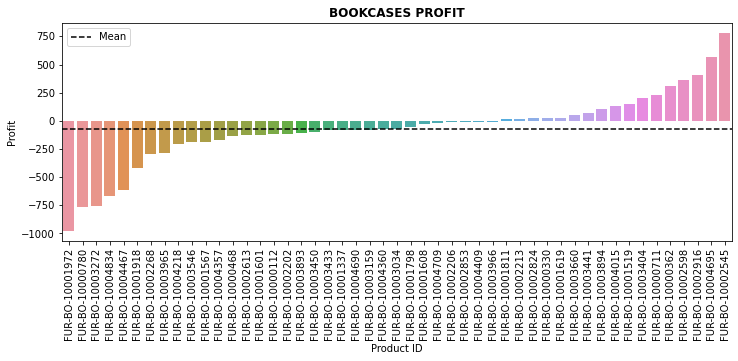

In [77]:
plt.figure(figsize=(12, 4))
sns.barplot(x=bookcases.index, y=bookcases.Profit)
plt.title('BOOKCASES PROFIT', fontweight='bold')
plt.axhline(bookcases.Profit.mean(), linestyle='--',color='black', label='Mean')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [32]:
#bookcases_lost_product_id = 
bookcases_loss_percent = bookcases_product_id['lost_percent'].where(bookcases_product_id.Profit <= 0)
bookcases_loss_percent = bookcases_loss_percent.dropna()
bookcases_loss_percent

Product ID
FUR-BO-10001972   28.08
FUR-BO-10000780   22.11
FUR-BO-10003272   21.76
FUR-BO-10004834   19.28
FUR-BO-10004467   17.65
FUR-BO-10001918   12.05
FUR-BO-10002268    8.49
FUR-BO-10003965    8.23
FUR-BO-10004218    6.01
FUR-BO-10003546    5.53
FUR-BO-10001567    5.50
FUR-BO-10004357    4.92
FUR-BO-10000468    3.83
FUR-BO-10002613    3.64
FUR-BO-10001601    3.62
FUR-BO-10000112    3.39
FUR-BO-10002202    3.26
FUR-BO-10003893    2.98
FUR-BO-10003450    2.81
FUR-BO-10003433    2.34
FUR-BO-10001337    2.26
FUR-BO-10004690    2.26
FUR-BO-10003159    2.25
FUR-BO-10004360    2.04
FUR-BO-10003034    1.96
FUR-BO-10001798    1.62
FUR-BO-10001608    0.78
FUR-BO-10004709    0.58
FUR-BO-10002206    0.37
FUR-BO-10002853    0.35
FUR-BO-10004409    0.29
FUR-BO-10003966    0.25
Name: lost_percent, dtype: float64

### Supplies Losses

In [33]:
# Productos que generan pérdidas
supplies = losses[losses['Sub-Category']=='Supplies']
supplies_product_id = supplies.groupby('Product ID').sum()
supplies_product_id['lost_percent'] = supplies_product_id.Profit / sum(supplies_product_id.Profit) * 100
supplies_product_id = supplies_product_id.sort_values('lost_percent', ascending=False)
supplies_product_id

,Postal Code,Sales,Quantity,Discount,Profit,lost_percent
Product ID,,,,,,
OFF-SU-10002881,277104,16656.20,22,1332.50,-1299.18,109.26
OFF-SU-10000646,195746,2836.37,14,423.05,-427.86,35.98
OFF-SU-10000151,266895,17030.31,11,786.01,-262.00,22.03
OFF-SU-10000157,354385,2982.75,26,95.45,-57.27,4.82
OFF-SU-10003567,335652,136.32,17,21.50,-21.98,1.85
OFF-SU-10004498,437490,236.99,20,16.49,-12.88,1.08
OFF-SU-10000432,284612,41.64,15,8.33,-7.81,0.66
OFF-SU-10001225,478107,80.22,24,6.48,-6.33,0.53
OFF-SU-10002301,187454,23.86,9,3.52,-4.11,0.35


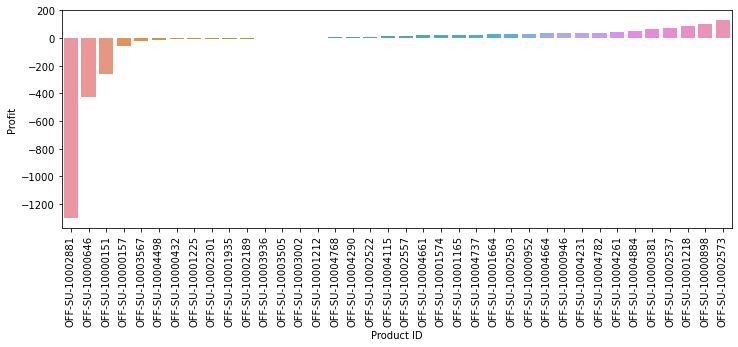

In [34]:
plt.figure(figsize=(12, 4))

sns.barplot(x=supplies_product_id.index, y=supplies_product_id.Profit)
plt.xticks(rotation=90)
plt.show()

### ANALYSIS BY SHIP MODE

In [35]:
grouped_by_shipmode = data.groupby(['Ship Mode']).sum().drop('Postal Code', axis=1)
grouped_by_shipmode['percent_sales'] = round(grouped_by_shipmode.Sales / sum(grouped_by_shipmode.Sales) * 100, 2)
grouped_by_shipmode['percent_quantity'] = round(grouped_by_shipmode.Quantity / sum(grouped_by_shipmode.Quantity) * 100, 2)
grouped_by_shipmode['percent_discount'] = round(grouped_by_shipmode.Discount / sum(grouped_by_shipmode.Discount) * 100, 2)
grouped_by_shipmode['percent_profit'] = round(grouped_by_shipmode.Profit / sum(grouped_by_shipmode.Profit) * 100, 2)
grouped_by_shipmode = grouped_by_shipmode.sort_values(by='percent_quantity', ascending=False)
grouped_by_shipmode

,Sales,Quantity,Discount,Profit,percent_sales,percent_quantity,percent_discount,percent_profit
Ship Mode,,,,,,,,
Standard Class,1358215.74,22797,194860.08,164088.79,59.12,60.19,60.41,57.29
Second Class,459193.57,7423,55830.73,57446.64,19.99,19.60,17.31,20.06
First Class,351428.42,5693,51795.19,48969.84,15.30,15.03,16.06,17.10
Same Day,128363.12,1960,20096.12,15891.76,5.59,5.18,6.23,5.55


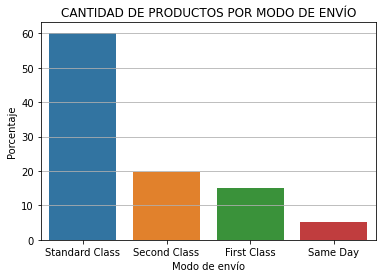

In [36]:
sns.barplot(x=grouped_by_shipmode.index, y=grouped_by_shipmode.percent_quantity)
plt.title('CANTIDAD DE PRODUCTOS POR MODO DE ENVÍO')
plt.xlabel('Modo de envío')
plt.ylabel('Porcentaje')
plt.grid(axis='y')
plt.show()

## TEMPORAL ANALYSIS

In [37]:
# Create Variable "OrderYear"
data['OrderYear'] = data['Order Date'].dt.year

# Create Variable "OrderMonth"
data['OrderMonth'] = data['Order Date'].dt.month

# Create Variable "OrderDay"
data['OrderDay'] = data['Order Date'].dt.day

# Create Variable "OrderWeekday"
data['OrderWeekday'] = data['Order Date'].dt.weekday

# Lista de los meses
meses = ['January','February','March','April','May','June','July','Agosto',
         'September','October','November','December']

# Serie temporal
data_date = data.set_index('Order Date').drop('Postal Code', axis=1)

In [38]:
# Datos agrupados por mes
data_by_month = data_date.groupby(data_date.index.month).sum()
data_by_month

,Sales,Quantity,Discount,Profit,OrderYear,OrderMonth,OrderDay,OrderWeekday
Order Date,,,,,,,,
1,94924.84,1475,13047.60,9134.45,768035,381,6359,1212
2,59751.25,1067,5740.24,10294.61,604751,600,4070,979
3,205005.49,2564,32876.57,28594.69,1402922,2088,11167,2125
4,137762.13,2447,19323.57,11587.44,1346461,2672,10034,2262
5,155028.81,2791,22125.60,22411.31,1481612,3675,12216,2329
6,152718.68,2680,20677.39,21285.80,1445309,4302,11094,2226
7,147238.10,2705,21910.24,13832.66,1431160,4970,11272,2349
8,159044.06,2784,23358.07,21776.94,1423049,5648,11890,2176
9,307649.95,5062,45513.03,36857.48,2787758,12447,20517,4418


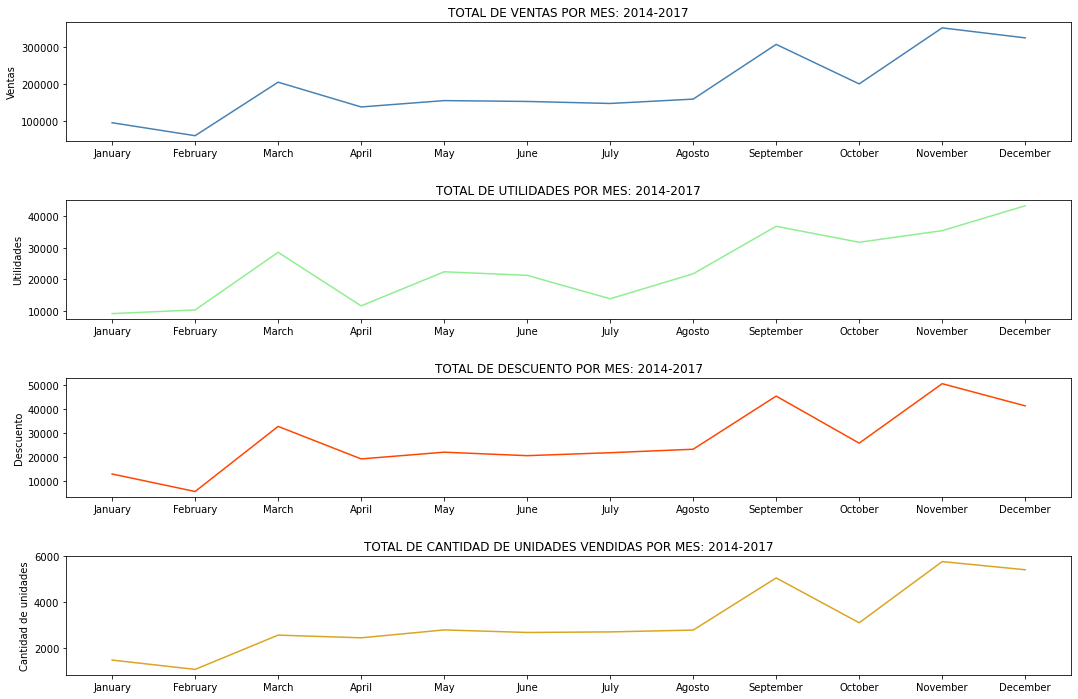

In [39]:
fig, ax = plt.subplots(4,1, figsize=(18,12))

# Ventas por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Sales, color='steelblue', ax=ax[0])
ax[0].set_title('TOTAL DE VENTAS POR MES: 2014-2017')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Ventas')
ax[0].set_xticks(np.arange(1,13))
ax[0].set_xticklabels(meses)

# Utilidades por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Profit, color='lightgreen', ax=ax[1])
ax[1].set_title('TOTAL DE UTILIDADES POR MES: 2014-2017')
ax[1].set_xlabel(None)
ax[1].set_ylabel('Utilidades')
ax[1].set_xticks(np.arange(1,13))
ax[1].set_xticklabels(meses)

# Descuento por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Discount, color='orangered', ax=ax[2])
ax[2].set_title('TOTAL DE DESCUENTO POR MES: 2014-2017')
ax[2].set_xlabel(None)
ax[2].set_ylabel('Descuento')
ax[2].set_xticks(np.arange(1,13))
ax[2].set_xticklabels(meses)

# Descuento por mes
sns.lineplot(x=data_by_month.index, y=data_by_month.Quantity, color='goldenrod', ax=ax[3])
ax[3].set_title('TOTAL DE CANTIDAD DE UNIDADES VENDIDAS POR MES: 2014-2017')
ax[3].set_xlabel(None)
ax[3].set_ylabel('Cantidad de unidades')
ax[3].set_xticks(np.arange(1,13))
ax[3].set_xticklabels(meses)

plt.subplots_adjust(hspace=.5)
plt.show()

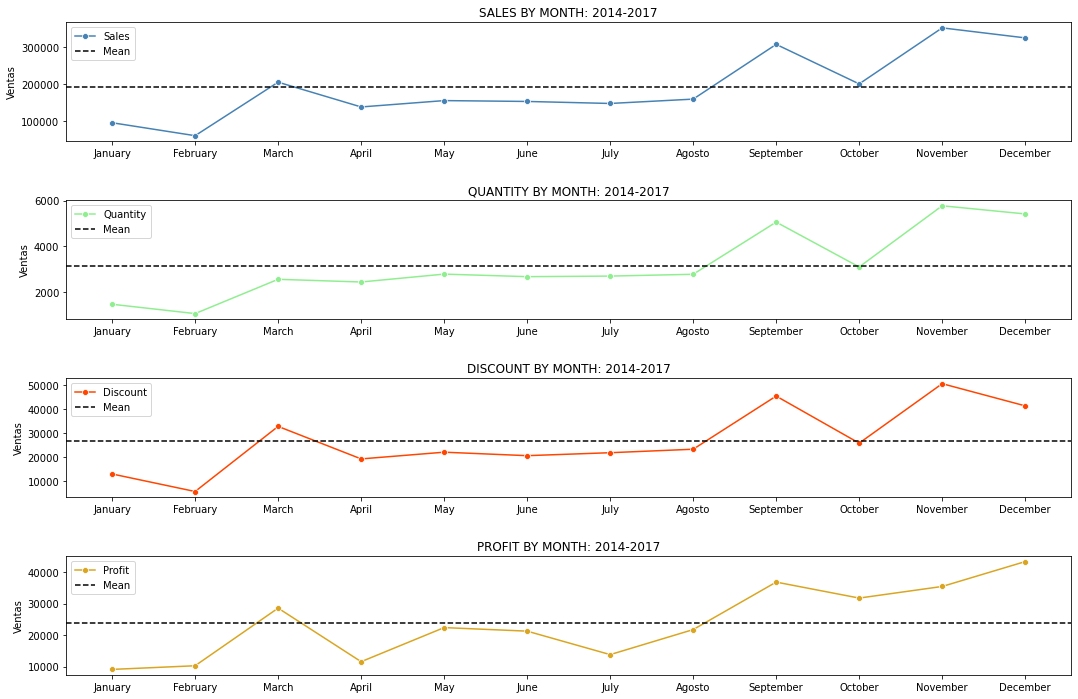

In [40]:
fig, ax = plt.subplots(4,1, figsize=(18,12))

for i, feature in enumerate(['Sales','Quantity','Discount','Profit']):
    colors = ['steelblue','lightgreen','orangered','goldenrod']
    sns.lineplot(x=data_by_month.index, y=data_by_month[feature], color=colors[i], ax=ax[i], marker='o')
    ax[i].set_title(f'{feature.upper()} BY MONTH: 2014-2017')
    ax[i].axhline(data_by_month[feature].mean(), color='black', linestyle='--')
    ax[i].set_xlabel(None)
    ax[i].set_ylabel('Ventas')
    ax[i].set_xticks(np.arange(1,13))
    ax[i].set_xticklabels(meses)
    ax[i].legend([feature, 'Mean'])
    
plt.subplots_adjust(hspace=.5)
plt.show()

In [41]:
data_by_month

,Sales,Quantity,Discount,Profit,OrderYear,OrderMonth,OrderDay,OrderWeekday
Order Date,,,,,,,,
1,94924.84,1475,13047.60,9134.45,768035,381,6359,1212
2,59751.25,1067,5740.24,10294.61,604751,600,4070,979
3,205005.49,2564,32876.57,28594.69,1402922,2088,11167,2125
4,137762.13,2447,19323.57,11587.44,1346461,2672,10034,2262
5,155028.81,2791,22125.60,22411.31,1481612,3675,12216,2329
6,152718.68,2680,20677.39,21285.80,1445309,4302,11094,2226
7,147238.10,2705,21910.24,13832.66,1431160,4970,11272,2349
8,159044.06,2784,23358.07,21776.94,1423049,5648,11890,2176
9,307649.95,5062,45513.03,36857.48,2787758,12447,20517,4418


#### Percentage Changes

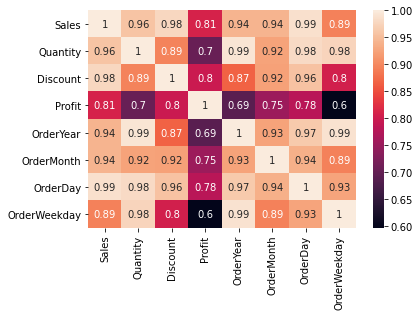

In [42]:
# Calculating percentage changes of variables
data_monthly_pct_changes = data_by_month.pct_change()

# Correlation Matrix
corr_matrix = data_monthly_pct_changes.corr()

# Visualizing Correlatin Matrix
sns.heatmap(corr_matrix, annot=True)

plt.show()

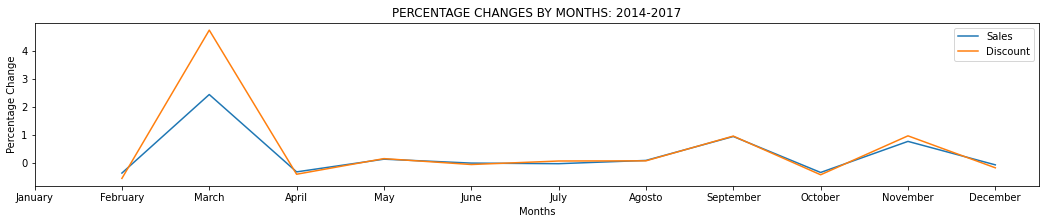

In [78]:
# Visualization of percentage changes
# ===========================================================================

fig, ax = plt.subplots(figsize=(18,3))

sns.lineplot(x=data_monthly_pct_changes.index, y=data_monthly_pct_changes.Sales)
sns.lineplot(x=data_monthly_pct_changes.index, y=data_monthly_pct_changes.Discount)
plt.title('PERCENTAGE CHANGES BY MONTHs: 2014-2017')
plt.xlabel('Months')
plt.ylabel('Percentage Change')
plt.xticks(np.arange(1, 13))
ax.set_xticklabels(meses)
plt.legend(['Sales','Discount'])
plt.show()

### TEMPORAL ANALYSIS BY REGION

In [44]:
date_region = data_date.groupby([data_date.index.month, 'Region']).mean()
date_region

Sales  Quantity  Discount  Profit  OrderYear  OrderMonth  \
Order Date Region                                                              
1          Central 290.67      3.62     35.07   26.20    2016.06        1.00   
           East    170.56      3.41     39.89   -5.75    2015.80        1.00   
           South   301.12      4.39     37.39   30.12    2015.31        1.00   
           West    235.29      4.14     26.24   42.64    2016.04        1.00   
2          Central 117.30      3.30     24.75   -7.37    2015.59        2.00   
           East    180.26      3.59     20.59   35.82    2016.00        2.00   
           South   403.49      3.92     12.30   99.18    2015.67        2.00   
           West    164.35      3.52     17.50   28.29    2015.97        2.00   
3          Central 232.86      3.71     43.65    6.93    2015.81        3.00   
           East    191.68      3.62     27.68   22.62    2015.81        3.00   
           South   436.41      3.70    111.41   56.36    2015.20        3.00   
           West    357.34      3.72     29.64   78.46    2015.78        3.00   
4          Central 191.24      3.58     36.43    0.01    2015.59        4.00   
           East    193.56      3.54     20.98   27.92    2015.79        4.00   
           South   227.94      3.77     17.44   33.09    2015.66        4.00   
           West    214.93      3.78     39.58    7.98    2015.58        4.00   
5          Central 188.51      3.73     27.02   18.85    2015.81        5.00   
           East    212.94      3.57     40.69   33.16    2015.68        5.00   
           South   225.49      3.92     21.49   39.69    2015.90        5.00   
           West    220.18      4.00     28.15   32.60    2015.85        5.00   
6          Central 193.41      3.70     29.04   13.09    2015.72        6.00   
           East    214.77      3.76     27.83   34.81    2015.76        6.00   
           South   194.67      3.50     23.28   29.69    2015.69        6.00   
           West    239.01      3.90     33.23   38.16    2015.89        6.00   
7          Central 190.02      4.01     39.54  -11.34    2015.73        7.00   
           East    167.99      3.67     29.41   18.63    2015.83        7.00   
           South   137.53      3.74     10.54   25.52    2015.68        7.00   
           West    289.94      3.82     34.87   40.83    2015.61        7.00   
8          Central 171.54      3.90     28.20   16.02    2015.85        8.00   
           East    239.51      4.12     40.65   23.41    2015.55        8.00   
           South   228.62      4.12     32.63   33.81    2015.51        8.00   
           West    244.60      3.76     30.73   43.35    2015.67        8.00   
9          Central 264.03      3.90     52.90   12.21    2015.72        9.00   
           East    239.23      3.53     33.56   27.50    2015.65        9.00   
           South   213.25      3.75     27.31   31.04    2015.79        9.00   
           West    182.15      3.60     21.62   33.31    2015.80        9.00   
10         Central 286.81      3.77     28.01   67.81    2015.81       10.00   
           East    305.45      3.76     32.07   62.64    2015.87       10.00   
           South   187.61      3.64     39.89  -13.00    2015.84       10.00   
           West    200.61      3.89     29.99   26.50    2015.66       10.00   
11         Central 175.27      3.83     26.98    6.52    2015.61       11.00   
           East    317.80      4.01     41.15   41.67    2015.66       11.00   
           South   262.28      4.00     50.12    9.95    2015.79       11.00   
           West    205.45      3.89     26.11   29.00    2015.64       11.00   
12         Central 237.85      3.79     26.12   36.95    2015.66       12.00   
           East    252.22      3.81     32.35   35.31    2015.76       12.00   
           South   207.13      3.77     22.32   27.38    2015.74       12.00   
           West    220.48      3.94     31.79   25.27    2015.69       12.00   

                   

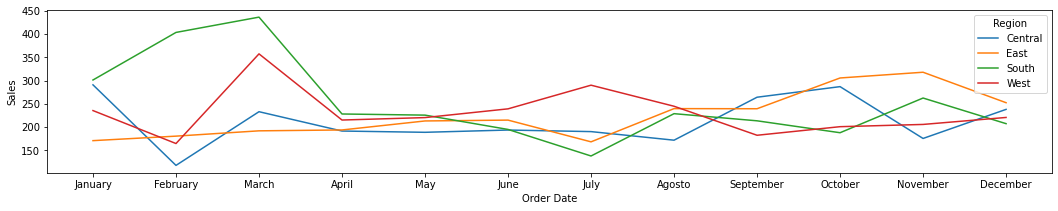

In [45]:
fig, ax = plt.subplots(figsize=(18,3))
sns.lineplot(x=date_region.index.get_level_values(0), y=date_region.Sales, 
             hue=date_region.index.get_level_values(1))
plt.xticks(np.arange(1, 13))
ax.set_xticklabels(meses)

plt.show()


### TEMPORAL ANALYSIS BY CATEGORY

In [46]:
date_category = data_date.groupby([data_date.index.month, 'Category']).mean()
date_category

Sales  Quantity  Discount  Profit  OrderYear  \
Order Date Category                                                        
1          Furniture       389.74      4.26     74.40  -24.00    2015.62   
           Office Supplies 146.40      3.78     12.22   27.51    2015.86   
           Technology      412.63      3.71     58.18   66.23    2016.03   
2          Furniture       250.25      3.30     40.71   11.01    2016.02   
           Office Supplies 116.62      3.72      7.82   24.15    2015.76   
           Technology      389.06      3.35     29.86   88.78    2015.87   
3          Furniture       362.63      3.76     65.14    5.51    2015.60   
           Office Supplies 136.20      3.69     10.38   25.26    2015.66   
           Technology      689.10      3.58    137.05  122.30    2015.88   
4          Furniture       294.92      3.69     49.86   10.58    2015.70   
           Office Supplies 117.98      3.63     12.90   11.33    2015.71   
           Technology      429.10      3.77     63.39   48.46    2015.43   
5          Furniture       322.43      3.92     44.78   15.35    2015.83   
           Office Supplies  95.39      3.79      8.09   20.02    2015.80   
           Technology      474.94      3.69     87.76   82.68    2015.75   
6          Furniture       365.51      3.71     63.09    6.78    2015.76   
           Office Supplies 116.06      3.78     12.04   25.00    2015.77   
           Technology      374.45      3.63     48.01   71.55    2015.81   
7          Furniture       301.08      3.77     51.47    8.61    2015.67   
           Office Supplies 104.13      3.77     13.52    5.62    2015.72   
           Technology      412.44      3.98     59.27   75.95    2015.78   
8          Furniture       361.97      3.72     68.97    0.03    2015.67   
           Office Supplies 137.77      4.00     16.74   28.10    2015.65   
           Technology      397.14      3.98     55.38   69.46    2015.63   
9          Furniture       377.24      3.54     59.59   19.36    2015.68   
           Office Supplies 117.79      3.69     13.78   20.00    2015.73   
           Technology      421.10      3.70     71.13   59.74    2015.80   
10         Furniture       310.63      3.79     60.49  -16.19    2015.84   
           Office Supplies 116.22      3.80     13.41   23.01    2015.76   
           Technology      554.34      3.76     52.31  152.12    2015.72   
11         Furniture       380.21      3.82     62.27   12.29    2015.68   
           Office Supplies 115.79      4.00     13.47   17.95    2015.64   
           Technology      455.33      3.83     66.58   55.70    2015.69   
12         Furniture       371.40      3.98     55.14   19.56    2015.68   
           Office Supplies 124.11      3.81     12.69   21.69    2015.74   
           Technology      398.55      3.79     50.82   75.16    2015.64   

                            OrderMonth  OrderDay  OrderWeekday  
Order Date Category                                             
1          Furniture              1.00     17.25          2.96  
           Office Supplies        1.00     16.69          3.19  
           Technology             1.00     16.07          3.41  
2          Furniture              2.00     13.19          2.95  
           Office Supplies        2.00     13.86          3.35  
           Technology             2.00     13.08          3.33  
3          Furniture              3.00     16.37          3.09  
           Office Supplies        3.00     16.03          2.99  
           Technology             3.00     15.77          3.22  
4          Furniture              4.00     16.27          3.63  
           Office Supplies        4.00     14.96          3.37  
           Technology             4.00     13.70          3.14  
5          Furniture              5.00     16.51          2.97  
           Office Supplies        5.00     16.26          3.18  
           Technology             5.00     17.96          3.34  
6          Furniture              

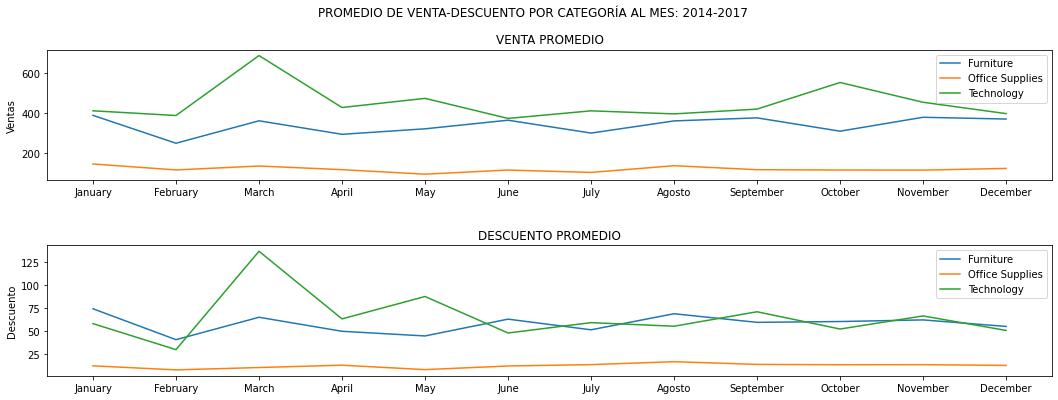

In [47]:
fig, ax = plt.subplots(2,1, figsize=(18,6))

sns.lineplot(x=date_category.index.get_level_values(0), y=date_category.Sales, 
             hue=date_category.index.get_level_values(1), ax=ax[0])
ax[0].set_title('VENTA PROMEDIO')
ax[0].set_xlabel(None)
ax[0].set_ylabel('Ventas')
ax[0].set_xticks(np.arange(1, 13))
ax[0].set_xticklabels(meses)
ax[0].legend(loc='upper right')

sns.lineplot(x=date_category.index.get_level_values(0), y=date_category.Discount, 
             hue=date_category.index.get_level_values(1), ax=ax[1])
ax[1].set_title('DESCUENTO PROMEDIO')
ax[1].set_xlabel(None)
ax[1].set_ylabel('Descuento')
ax[1].set_xticks(np.arange(1, 13))
ax[1].set_xticklabels(meses)
ax[1].legend(loc='upper right')

plt.suptitle('PROMEDIO DE VENTA-DESCUENTO POR CATEGORÍA AL MES: 2014-2017')
plt.subplots_adjust(hspace=.5)
plt.show()

### ANÁLISIS TEMPORAL POR SUB-CATEGORÍA

In [48]:
date_subcategory = data_date.groupby([data_date.index.month, 'Sub-Category']).mean()
date_subcategory

Sales  Quantity  Discount  Profit  OrderYear  \
Order Date Sub-Category                                                 
1          Accessories  182.60      3.70      9.46   44.59    2016.10   
           Appliances   288.75      3.64     41.72   54.44    2016.00   
           Art           22.86      3.27      0.99    5.82    2015.78   
           Binders      200.23      4.00     27.92   46.75    2016.00   
           Bookcases    411.72      3.69     76.99  -42.40    2015.23   
...                        ...       ...       ...     ...        ...   
12         Paper         58.59      3.85      3.44   25.60    2015.68   
           Phones       343.51      3.63     51.40   47.30    2015.65   
           Storage      255.36      3.31      8.81   31.14    2015.72   
           Supplies     176.08      3.56      8.99   -0.60    2015.80   
           Tables       816.53      4.29    144.26  -18.44    2015.71   

                         OrderMonth  OrderDay  OrderWeekday  
Order Date Sub-Category                                      
1          Accessories         1.00     14.43          4.17  
           Appliances          1.00     13.64          3.18  
           Art                 1.00     16.00          2.55  
           Binders             1.00     16.23          3.08  
           Bookcases           1.00     15.69          4.08  
...                             ...       ...           ...  
12         Paper              12.00     13.40          3.40  
           Phones             12.00     13.24          3.17  
           Storage            12.00     15.17          3.66  
           Supplies           12.00     17.72          3.52  
           Tables             12.00     14.79          3.75  

[203 rows x 8 columns]

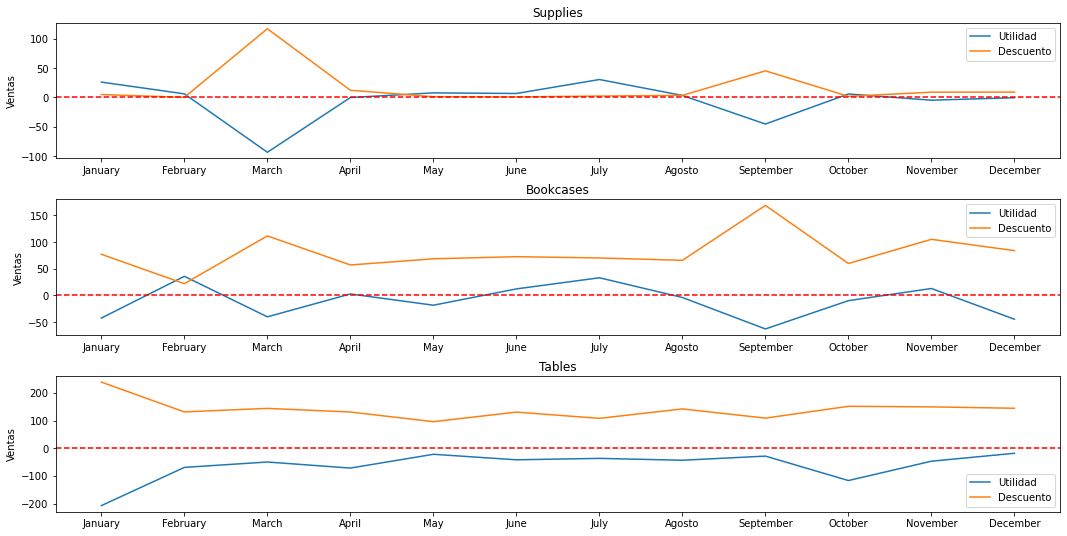

In [49]:
fig, ax = plt.subplots(3,1, figsize=(18, 9))
for i, sub in enumerate(['Supplies', 'Bookcases', 'Tables']):
    mask = date_subcategory[date_subcategory.index.get_level_values(1)== sub]
    sns.lineplot(x=mask.index.get_level_values(0), y=mask.Profit, ax=ax[i])
    sns.lineplot(x=mask.index.get_level_values(0), y=mask.Discount, ax=ax[i])
    ax[i].set_title(sub)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel('Ventas')
    ax[i].set_xticks(np.arange(1,13))
    ax[i].set_xticklabels(meses)
    ax[i].axhline(y=0, color='r', linestyle='--')
    ax[i].legend(['Utilidad','Descuento'])

plt.subplots_adjust(hspace=.3)